In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
import pandas as pd
import os

def merge_df():
    done = 0
    complete_df_path = "data/complete_df.csv"
    all_dfs = []

    for cur_root, _, files in os.walk("data/instances"):
        print(cur_root, files)
        for f in files:
            if f.endswith(".csv"):
                p = os.path.join(cur_root, f)
                df = pd.read_csv(p)
                all_dfs.append(df)

    # Concatenate all DataFrames
    complete_df = pd.concat(all_dfs)

    # Remove duplicates, keeping only the first occurrence
    complete_df = complete_df.drop_duplicates()

    # Save the final DataFrame
    complete_df.to_csv(complete_df_path, index=False)

merge_df()


data/instances ['graph_instances_DESKTOP-CN1HT7H.csv', 'graph_instances_DESKTOP-L4ERV45.csv', 'graph_instances_HciLab-PostazionePedana.csv']


### Load the data

In [28]:
meta_metrics_raw = pd.read_csv("./data/complete_df.csv")

In [29]:
meta_metrics_raw[meta_metrics_raw.duplicated()]

,graph_type,num_nodes,num_edges,nodes,edges,ratio_n_m,ratio_m_n,density,starting_node,target_node,...,bfs_alg_std_duration,bfs_alg_avg_memory_used,bfs_alg_median_memory_used,bfs_alg_std_memory_used,dfs_alg_avg_duration,dfs_alg_median_duration,dfs_alg_std_duration,dfs_alg_avg_memory_used,dfs_alg_median_memory_used,dfs_alg_std_memory_used


In [30]:
meta_metrics_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   graph_type                       5940 non-null   object 
 1   num_nodes                        5940 non-null   int64  
 2   num_edges                        5940 non-null   int64  
 3   nodes                            5940 non-null   int64  
 4   edges                            5940 non-null   int64  
 5   ratio_n_m                        5940 non-null   float64
 6   ratio_m_n                        5940 non-null   float64
 7   density                          5940 non-null   float64
 8   starting_node                    5940 non-null   int64  
 9   target_node                      5940 non-null   int64  
 10  path_length                      5940 non-null   int64  
 11  min_degree                       5940 non-null   int64  
 12  max_degree          

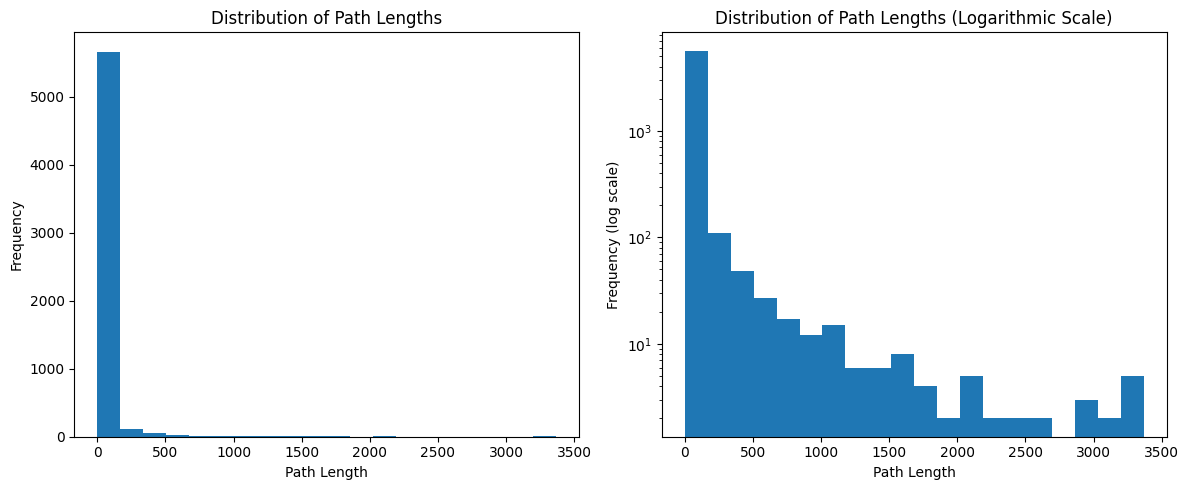

In [31]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot: Histogram without logarithmic scale
axes[0].hist(meta_metrics_raw['path_length'], bins=20)
axes[0].set_xlabel('Path Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Path Lengths')

# Second subplot: Histogram with logarithmic scale
axes[1].hist(meta_metrics_raw['path_length'], bins=20, log=True)
axes[1].set_xlabel('Path Length')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Distribution of Path Lengths (Logarithmic Scale)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


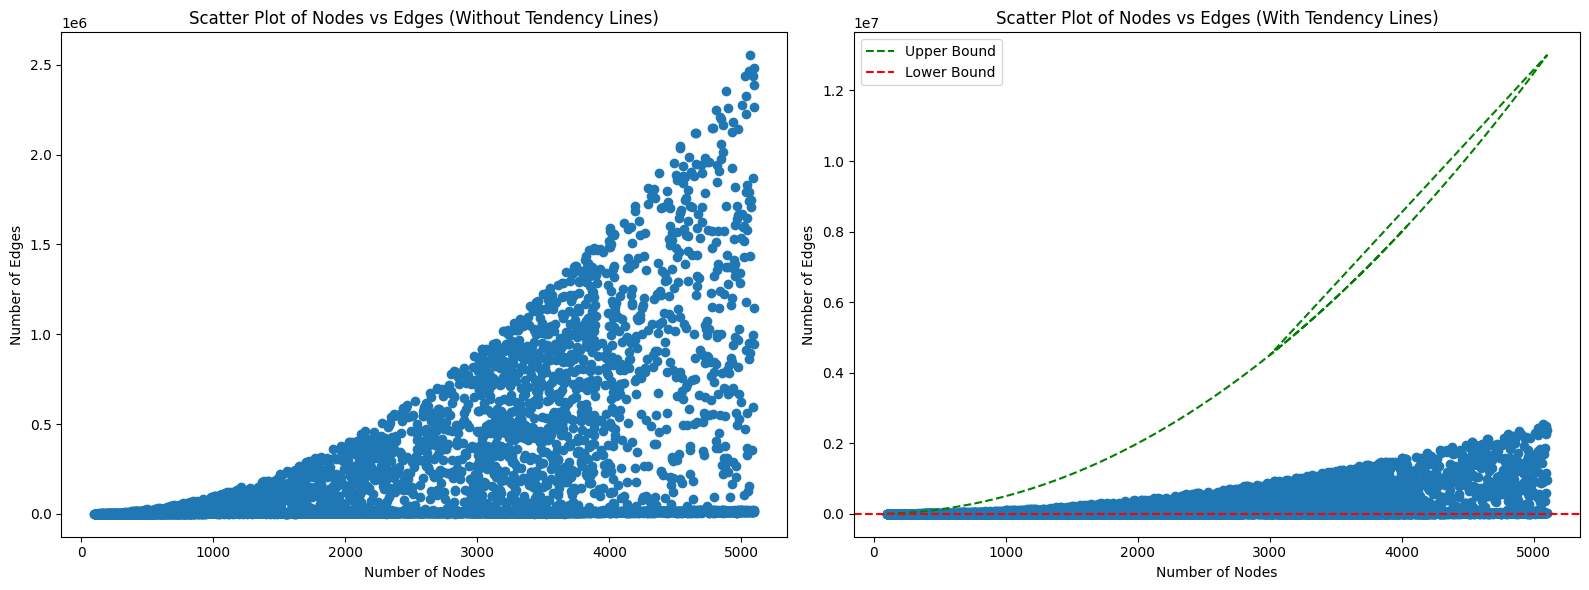

In [33]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

upper_bound = meta_metrics_raw['num_nodes'] * (meta_metrics_raw['num_nodes'] - 1) / 2

# Scatter plot of graph sizes (nodes vs edges) without tendency lines
ax1.scatter(meta_metrics_raw['num_nodes'], meta_metrics_raw['num_edges'])
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Number of Edges')
ax1.set_title('Scatter Plot of Nodes vs Edges (Without Tendency Lines)')

# Scatter plot of graph sizes (nodes vs edges) with upper and lower bound lines
ax2.scatter(meta_metrics_raw['num_nodes'], meta_metrics_raw['num_edges'])
ax2.plot(meta_metrics_raw['num_nodes'], upper_bound, color='g', linestyle='--', label='Upper Bound')
ax2.axhline(0, color='r', linestyle='--', label='Lower Bound')
ax2.set_xlabel('Number of Nodes')
ax2.set_ylabel('Number of Edges')
ax2.set_title('Scatter Plot of Nodes vs Edges (With Tendency Lines)')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


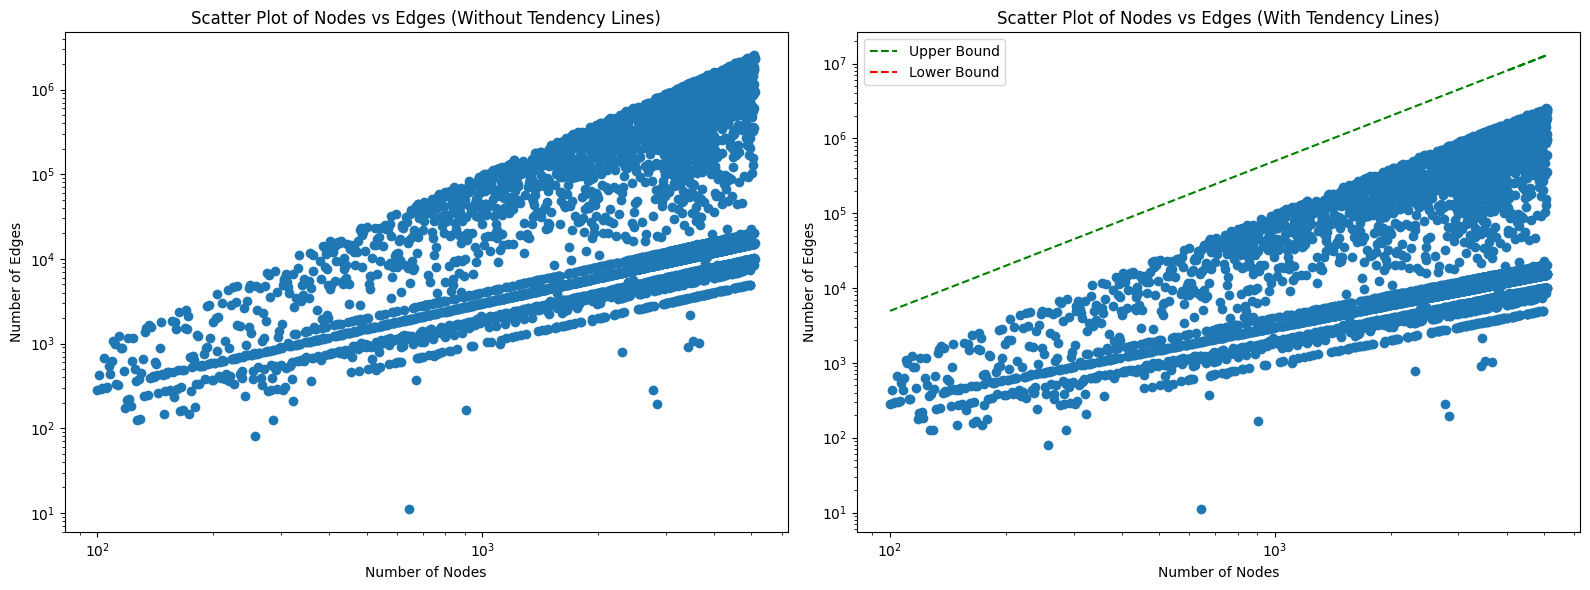

In [34]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of graph sizes (nodes vs edges) without tendency lines
ax1.scatter(meta_metrics_raw['num_nodes'], meta_metrics_raw['num_edges'])
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Number of Edges')
ax1.set_title('Scatter Plot of Nodes vs Edges (Without Tendency Lines)')

# Scatter plot of graph sizes (nodes vs edges) with upper and lower bound lines
ax2.scatter(meta_metrics_raw['num_nodes'], meta_metrics_raw['num_edges'])
ax2.plot(meta_metrics_raw['num_nodes'], upper_bound, color='g', linestyle='--', label='Upper Bound')
ax2.axhline(0, color='r', linestyle='--', label='Lower Bound')
ax2.set_xlabel('Number of Nodes')
ax2.set_ylabel('Number of Edges')
ax2.set_title('Scatter Plot of Nodes vs Edges (With Tendency Lines)')
ax2.legend()

# Set log scale for both plots
for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


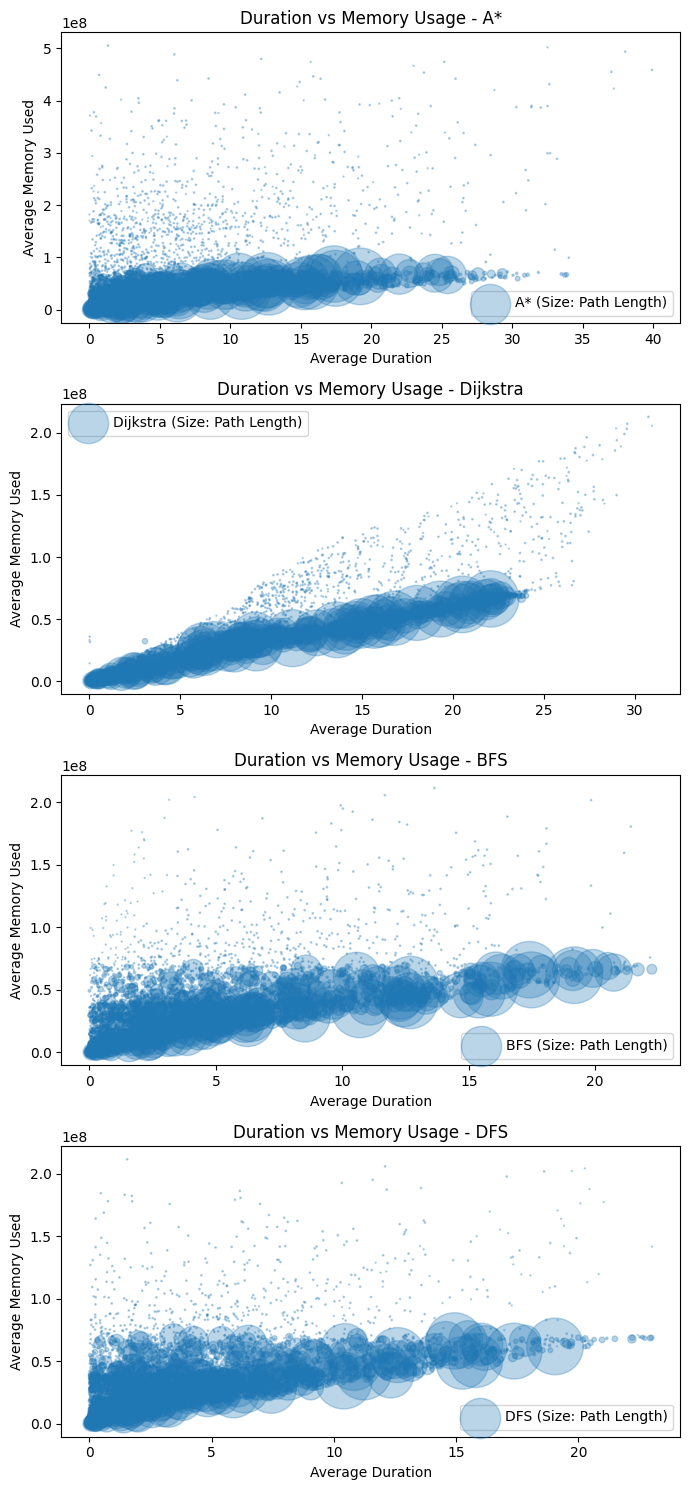

In [35]:
# Map algorithm names
algorithm_names = {'astar_alg': 'A*', 'dijkstra_alg': 'Dijkstra', 'bfs_alg': 'BFS', 'dfs_alg': 'DFS'}

# Create a figure with subplots (rows: len(algorithms), columns: 1 for duration vs. memory usage)
fig, axes = plt.subplots(len(algorithm_names), 1, figsize=(7, 15))

for i, algorithm in enumerate(algorithm_names):
    algorithm_name = algorithm_names[algorithm]
    
    # Scatter plot of duration vs memory usage
    scatter = axes[i].scatter(meta_metrics_raw[f'{algorithm}_avg_duration'],
                              meta_metrics_raw[f'{algorithm}_avg_memory_used'],
                              s=meta_metrics_raw['path_length']*0.5,  # Size based on the ratio of edges to nodes
                              alpha=0.3, label=f'{algorithm_name} (Size: Path Length)')
    
    axes[i].set_xlabel('Average Duration')
    axes[i].set_ylabel('Average Memory Used')
    axes[i].set_title(f'Duration vs Memory Usage - {algorithm_name}')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


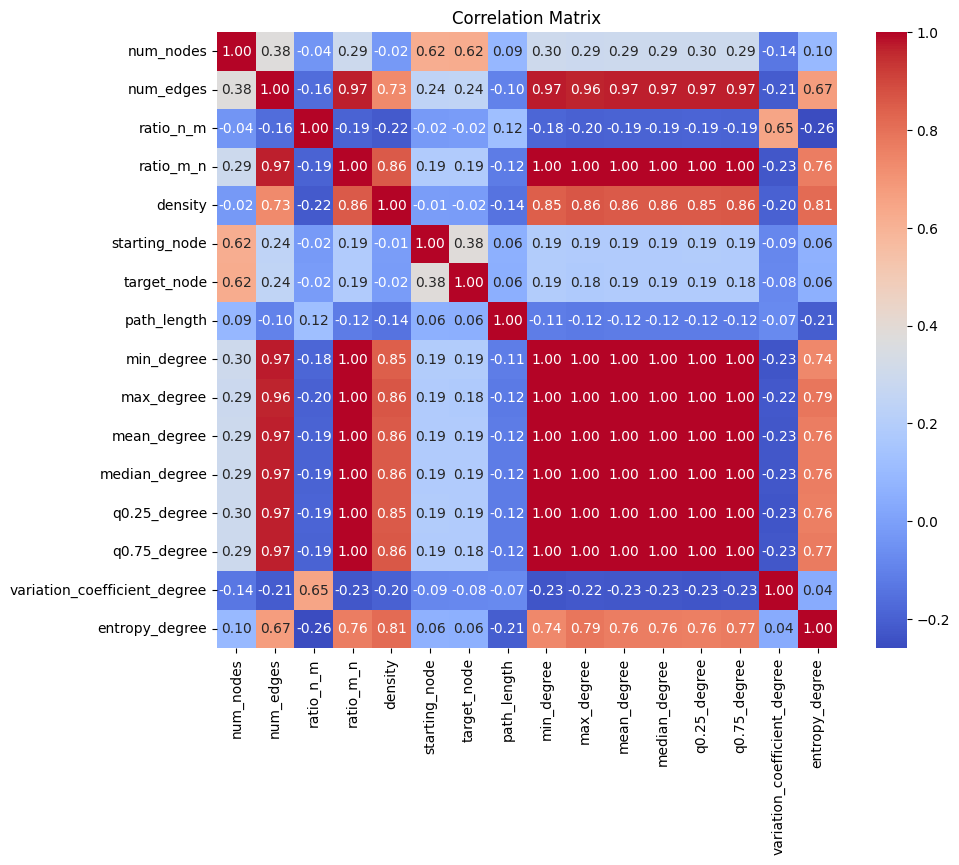

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of features for analysis
selected_features = [
    'num_nodes', 'num_edges', 'ratio_n_m', 'ratio_m_n', 'density',
    'starting_node', 'target_node', 'path_length', 'min_degree',
    'max_degree', 'mean_degree', 'median_degree', 'q0.25_degree',
    'q0.75_degree', 'variation_coefficient_degree', 'entropy_degree'
]

# Create a DataFrame with selected features
selected_data = meta_metrics_raw[selected_features]

# Summary statistics
summary_stats = selected_data.describe()

# Correlation matrix
correlation_matrix = selected_data.corr()


# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



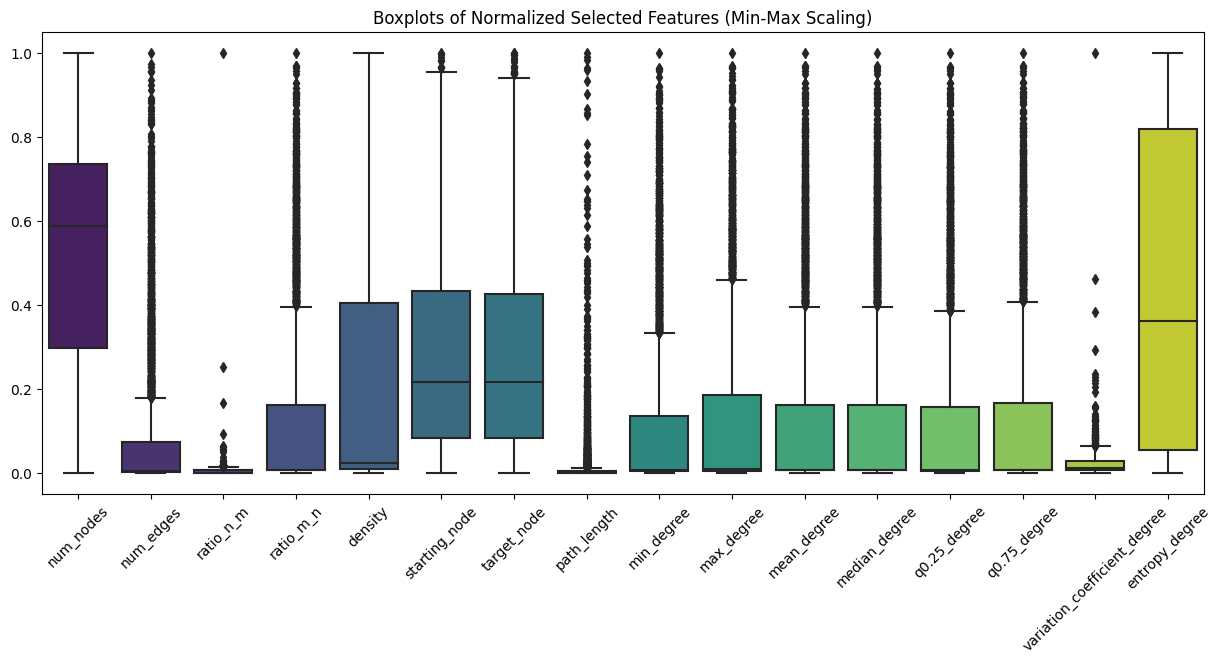

In [37]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected data using Min-Max scaling
normalized_data = pd.DataFrame(scaler.fit_transform(selected_data), columns=selected_data.columns)

# Boxplots for normalized features
plt.figure(figsize=(15, 6))
sns.boxplot(data=normalized_data, palette='viridis')
plt.title('Boxplots of Normalized Selected Features (Min-Max Scaling)')
plt.xticks(rotation=45)
plt.show()


In [38]:
meta_metrics_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   graph_type                       5940 non-null   object 
 1   num_nodes                        5940 non-null   int64  
 2   num_edges                        5940 non-null   int64  
 3   nodes                            5940 non-null   int64  
 4   edges                            5940 non-null   int64  
 5   ratio_n_m                        5940 non-null   float64
 6   ratio_m_n                        5940 non-null   float64
 7   density                          5940 non-null   float64
 8   starting_node                    5940 non-null   int64  
 9   target_node                      5940 non-null   int64  
 10  path_length                      5940 non-null   int64  
 11  min_degree                       5940 non-null   int64  
 12  max_degree          

In [39]:
label_col_idxs = range(1,19)
feature_col_idxs = range(19,42)
numerical_col_idxs = range(1,len(meta_metrics_raw.columns))

In [40]:
graph_type_mapping = {
        'generate_2d_grid_graph': '2D grid',
        'generate_delaunay_graph': 'Delaunay',
        'generate_dense_random_graph': 'Dense Random',
        'generate_random_graph': 'Random',
        'generate_random_regular_graph': 'Random Regular'
    }

meta_metrics_raw.replace(graph_type_mapping, inplace=True)
meta_metrics_raw.head()

,graph_type,num_nodes,num_edges,nodes,edges,ratio_n_m,ratio_m_n,density,starting_node,target_node,...,bfs_alg_std_duration,bfs_alg_avg_memory_used,bfs_alg_median_memory_used,bfs_alg_std_memory_used,dfs_alg_avg_duration,dfs_alg_median_duration,dfs_alg_std_duration,dfs_alg_avg_memory_used,dfs_alg_median_memory_used,dfs_alg_std_memory_used
0,Delaunay,100,286,100,286,0.349650,2.860000,0.057778,90,75,...,0.000236,9395.333333,3547,21478.249881,0.001356,0.001327,0.000057,9419.733333,3707,21315.252381
1,Random,101,430,101,430,0.234884,4.257426,0.085149,29,77,...,0.000096,10097.642857,3563,23498.890283,0.004529,0.004560,0.000057,10452.785714,3979,23238.994038
2,Delaunay,102,293,102,293,0.348123,2.872549,0.056882,77,90,...,0.000180,9990.500000,3579,23054.892913,0.001865,0.001830,0.000110,10036.357143,3675,22874.100487
3,Delaunay,103,296,103,296,0.347973,2.873786,0.056349,60,23,...,0.000246,10133.071429,3595,23511.252159,0.003206,0.003152,0.000196,10325.785714,3851,23283.072533
4,Dense Random,104,668,104,668,0.155689,6.423077,0.124720,80,54,...,0.000165,12894.928571,3675,33180.817790,0.005113,0.005069,0.000254,13328.785714,4187,32899.069874


In [41]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(meta_metrics_raw.iloc[:,numerical_col_idxs])

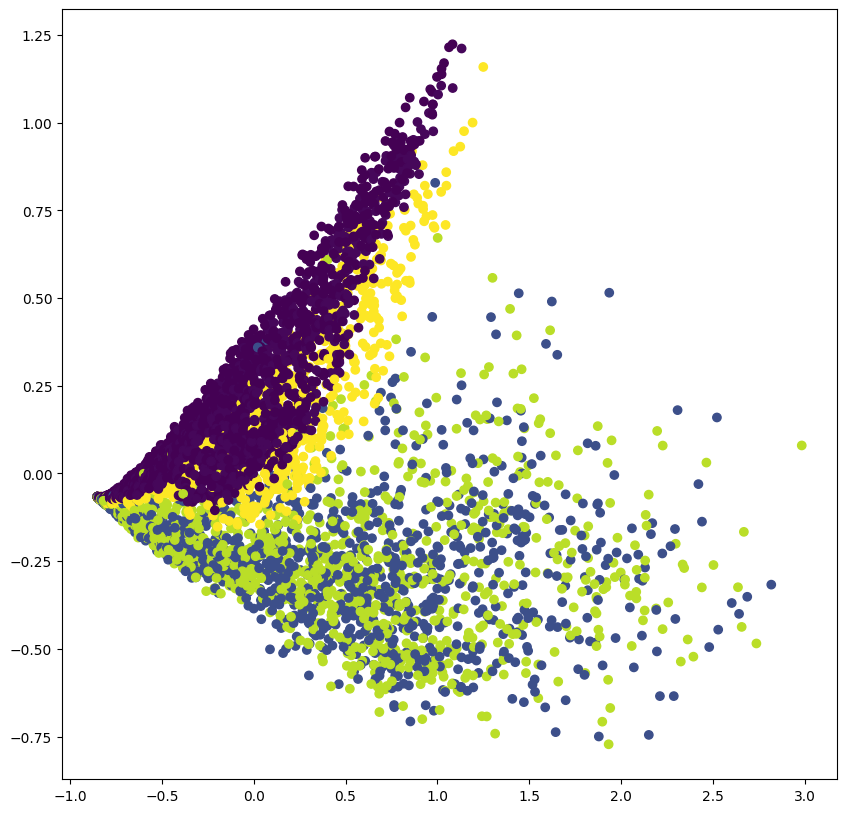

In [42]:
pca = PCA(2)
pca_ed = pca.fit_transform(scaled[:,feature_col_idxs])
colors = [float(hash(s) % 256) / 256 for s in meta_metrics_raw.iloc[:,0]]   
plt.figure(figsize=(10, 10))
plt.scatter(pca_ed[:,0], pca_ed[:,1], c=colors)

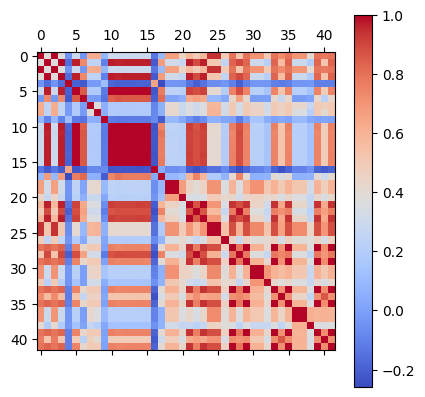

In [43]:
plt.matshow(meta_metrics_raw.iloc[:,numerical_col_idxs].corr(), cmap='coolwarm')
plt.colorbar() #show clolor scale

In [44]:
for idx, col_name in enumerate(meta_metrics_raw.columns):
    print(f"Index: {idx}, Column: {col_name}")


Index: 0, Column: graph_type
Index: 1, Column: num_nodes
Index: 2, Column: num_edges
Index: 3, Column: nodes
Index: 4, Column: edges
Index: 5, Column: ratio_n_m
Index: 6, Column: ratio_m_n
Index: 7, Column: density
Index: 8, Column: starting_node
Index: 9, Column: target_node
Index: 10, Column: path_length
Index: 11, Column: min_degree
Index: 12, Column: max_degree
Index: 13, Column: mean_degree
Index: 14, Column: median_degree
Index: 15, Column: q0.25_degree
Index: 16, Column: q0.75_degree
Index: 17, Column: variation_coefficient_degree
Index: 18, Column: entropy_degree
Index: 19, Column: astar_alg_avg_duration
Index: 20, Column: astar_alg_median_duration
Index: 21, Column: astar_alg_std_duration
Index: 22, Column: astar_alg_avg_memory_used
Index: 23, Column: astar_alg_median_memory_used
Index: 24, Column: astar_alg_std_memory_used
Index: 25, Column: dijkstra_alg_avg_duration
Index: 26, Column: dijkstra_alg_median_duration
Index: 27, Column: dijkstra_alg_std_duration
Index: 28, Column

In [45]:
import pickle

TIME_W = 0.6
SPACE_W = 0.4

minmaxer = MinMaxScaler()
minmaxed =  minmaxer.fit_transform(meta_metrics_raw.iloc[:,[19,22,25,28,31,34,37,40]])
print(minmaxed.shape, type(minmaxed))
temp = pd.DataFrame(minmaxed)

for i in range(minmaxed.shape[0]):
    time = temp.iloc[i, [0,2,4,6]]
    space = temp.iloc[i,[1,3,5,7]]
    alg = ["astar_alg", "dijkstra_alg", "bfs_alg", "dfs_alg"]

    l = [TIME_W*x+SPACE_W*y for x,y in zip(time, space)]
    best_idx = np.argmin(l)
    meta_metrics_raw.loc[i,"best_alg"] = alg[best_idx]

meta_metrics_raw.head(20)

# Save the scaler to a file
#scaler_filename = "./data/metrics_scaler.pkl"
#with open(scaler_filename, 'wb') as scaler_file:
#    pickle.dump(scaler, scaler_file)

(5940, 8) <class 'numpy.ndarray'>


,graph_type,num_nodes,num_edges,nodes,edges,ratio_n_m,ratio_m_n,density,starting_node,target_node,...,bfs_alg_avg_memory_used,bfs_alg_median_memory_used,bfs_alg_std_memory_used,dfs_alg_avg_duration,dfs_alg_median_duration,dfs_alg_std_duration,dfs_alg_avg_memory_used,dfs_alg_median_memory_used,dfs_alg_std_memory_used,best_alg
0,Delaunay,100,286,100,286,0.349650,2.860000,0.057778,90,75,...,9395.333333,3547,21478.249881,0.001356,0.001327,0.000057,9419.733333,3707,21315.252381,dfs_alg
1,Random,101,430,101,430,0.234884,4.257426,0.085149,29,77,...,10097.642857,3563,23498.890283,0.004529,0.004560,0.000057,10452.785714,3979,23238.994038,bfs_alg
2,Delaunay,102,293,102,293,0.348123,2.872549,0.056882,77,90,...,9990.500000,3579,23054.892913,0.001865,0.001830,0.000110,10036.357143,3675,22874.100487,dfs_alg
3,Delaunay,103,296,103,296,0.347973,2.873786,0.056349,60,23,...,10133.071429,3595,23511.252159,0.003206,0.003152,0.000196,10325.785714,3851,23283.072533,dfs_alg
4,Dense Random,104,668,104,668,0.155689,6.423077,0.124720,80,54,...,12894.928571,3675,33180.817790,0.005113,0.005069,0.000254,13328.785714,4187,32899.069874,astar_alg
5,Delaunay,105,302,105,302,0.347682,2.876190,0.055311,93,11,...,10407.500000,3627,24385.339843,0.006579,0.006558,0.000162,10694.928571,3979,24152.524495,bfs_alg
6,Delaunay,106,305,106,305,0.347541,2.877358,0.054807,37,4,...,10589.714286,3643,24839.231485,0.003961,0.003959,0.000153,10889.071429,3995,24560.557144,dfs_alg
7,Dense Random,107,545,107,545,0.196330,5.093458,0.096103,97,86,...,11352.714286,3723,27350.675281,0.001951,0.001891,0.000128,11698.785714,4171,27079.714232,bfs_alg
8,Random Regular,108,432,108,432,0.250000,4.000000,0.074766,3,107,...,11552.615385,3611,27445.923726,0.000450,0.000450,0.000008,11594.615385,3707,27258.862405,dfs_alg
9,Random,109,618,109,618,0.176375,5.669725,0.104995,25,14,...,13041.769231,3755,31864.502707,0.003532,0.003503,0.000101,13401.538462,4267,31578.327307,astar_alg


In [46]:
meta_metrics_raw.groupby(by=["best_alg"]).describe()

num_nodes                                                    \
                 count         mean          std    min      25%     50%   
best_alg                                                                   
astar_alg       3583.0  2760.466369  1343.867856  104.0  1656.50  3051.0   
bfs_alg          777.0  2693.939511  1371.972426  101.0  1528.00  2961.0   
dfs_alg         1568.0  2712.777423  1414.626865  100.0  1435.75  3045.0   
dijkstra_alg      12.0  2104.416667  1347.499061  375.0   901.25  1754.5   

                             num_edges                 ...  \
                 75%     max     count           mean  ...   
best_alg                                               ...   
astar_alg     3769.5  5098.0    3583.0  150641.411945  ...   
bfs_alg       3751.0  5095.0     777.0  366290.483912  ...   
dfs_alg       3813.5  5099.0    1568.0  236337.703444  ...   
dijkstra_alg  3234.5  4207.0      12.0   33425.500000  ...   

             dfs_alg_median_memory_used           dfs_alg_std_memory_used  \
                                    75%       max                   count   
best_alg                                                                    
astar_alg                      196635.0  396859.0                  3583.0   
bfs_alg                        226595.0  396107.0                   777.0   
dfs_alg                        177058.0  388923.0                  1568.0   
dijkstra_alg                   139560.0  163571.0                    12.0   

                                                                       \
                      mean           std            min           25%   
best_alg                                                                
astar_alg     4.343203e+07  3.961446e+07   31578.327307  1.176878e+07   
bfs_alg       5.459799e+07  5.180123e+07   23238.994038  1.338111e+07   
dfs_alg       4.849555e+07  4.764740e+07   21315.252381  9.852337e+06   
dijkstra_alg  2.338402e+07  2.373761e+07  494834.935877  3.392930e+06   

                                                        
                       50%           75%           max  
best_alg                                                
astar_alg     3.753806e+07  6.161997e+07  2.904526e+08  
bfs_alg       4.338384e+07  8.114687e+07  2.882371e+08  
dfs_alg       3.995396e+07  6.844361e+07  2.984990e+08  
dijkstra_alg  1.246892e+07  4.219547e+07  6.688124e+07  

[4 rows x 336 columns]

(array([1568.,    0.,    0.,  777.,    0.,    0., 3583.,    0.,    0.,
          12.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

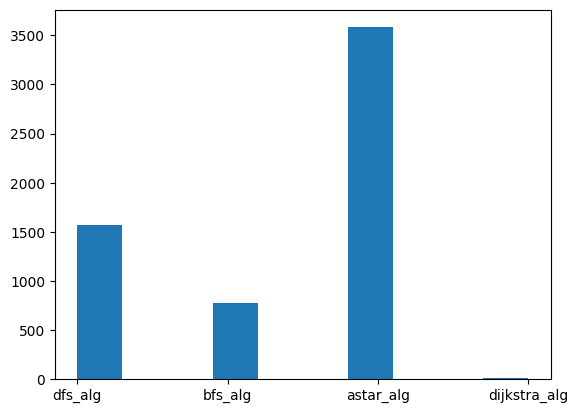

In [47]:
plt.hist(meta_metrics_raw['best_alg'])

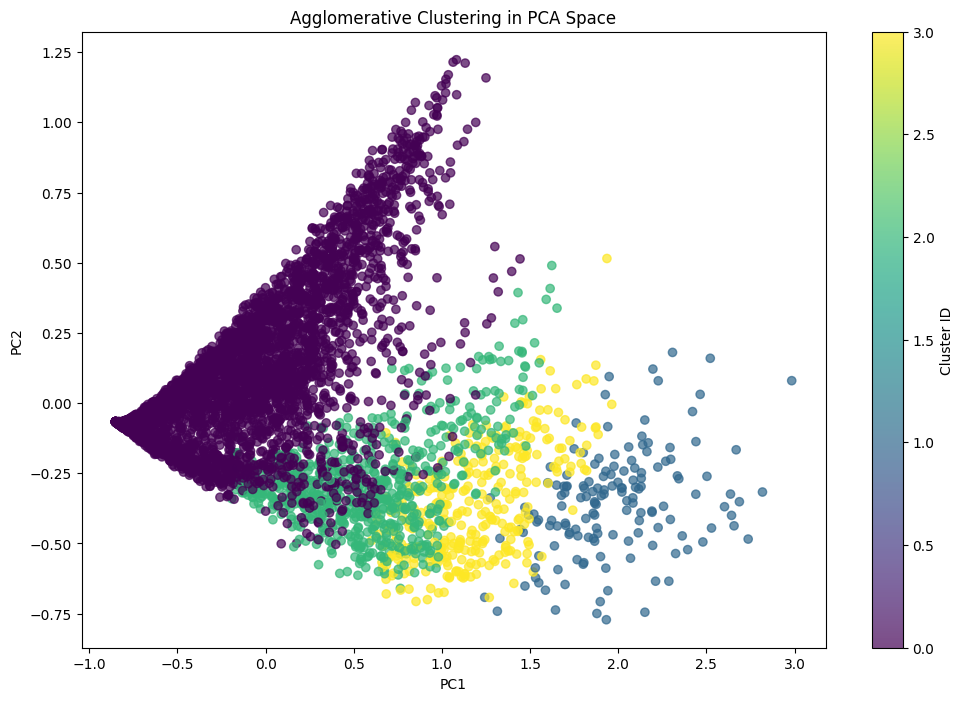

In [48]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'graph_type' is the column containing categorical values
label_encoder = LabelEncoder()
meta_metrics_raw['graph_type_encoded'] = label_encoder.fit_transform(meta_metrics_raw['graph_type'])

# Now, you can use 'graph_type_encoded' instead of 'graph_type' in the clustering
clusterizer = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
clusterized = clusterizer.fit_predict(meta_metrics_raw[[
    'num_nodes', 'num_edges', 'ratio_n_m', 'ratio_m_n', 'density',
    'starting_node', 'target_node', 'path_length', 'min_degree',
    'max_degree', 'mean_degree', 'median_degree', 'q0.25_degree',
    'q0.75_degree', 'variation_coefficient_degree', 'entropy_degree'
]])

# Visualize clusters in the PCA space
plt.figure(figsize=(12, 8))
plt.scatter(pca_ed[:, 0], pca_ed[:, 1], c=clusterized, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering in PCA Space')
plt.colorbar(label='Cluster ID')

plt.show()


In [49]:
import pandas as pd

# Assuming meta_metrics_raw is your original DataFrame

# Group by 'graph_type'
grouped_df = meta_metrics_raw.groupby('graph_type')

# Calculate average duration and memory used for each algorithm
avg_duration_cols = ['astar_alg_avg_duration', 'dijkstra_alg_avg_duration', 'bfs_alg_avg_duration', 'dfs_alg_avg_duration']
avg_memory_cols = ['astar_alg_avg_memory_used', 'dijkstra_alg_avg_memory_used', 'bfs_alg_avg_memory_used', 'dfs_alg_avg_memory_used']

# Iterate over each group and calculate global averages
metrics = []

for name, group in grouped_df:
    avg_duration = group[avg_duration_cols].mean(axis=1).mean()
    avg_memory_used = group[avg_memory_cols].mean(axis=1).mean()
    
    # Append the results to the new DataFrame
    metrics.append({
        'graph_type': name,
        'global_avg_duration': avg_duration,
        'global_avg_memory_used': avg_memory_used
    })

graphtype_metrics_df = pd.DataFrame(metrics)
# Print or use graphtype_metrics_df as needed
graphtype_metrics_df


,graph_type,global_avg_duration,global_avg_memory_used
0,2D grid,5.112381,2.513475e+07
1,Delaunay,5.455225,2.578947e+07
2,Dense Random,5.641072,5.818904e+07
3,Random,5.609583,5.761505e+07
4,Random Regular,5.016162,2.506281e+07


In [50]:
# Group by 'graph_type'
grouped_df = meta_metrics_raw.groupby('graph_type')

# Calculate average nodes and edges for each 'graph_type'
avg_nodes_edges_df = grouped_df[['num_nodes', 'num_edges']].mean().reset_index()

# Merge with graphtype_metrics_df
graphtype_metrics_df = pd.merge(graphtype_metrics_df, avg_nodes_edges_df, on='graph_type')

# Calculate ratios
graphtype_metrics_df['avg_duration_per_node'] = graphtype_metrics_df['global_avg_duration'] / graphtype_metrics_df['num_nodes']
graphtype_metrics_df['avg_duration_per_edge'] = graphtype_metrics_df['global_avg_duration'] / graphtype_metrics_df['num_edges']
graphtype_metrics_df['avg_memory_per_node'] = graphtype_metrics_df['global_avg_memory_used'] / graphtype_metrics_df['num_nodes']
graphtype_metrics_df['avg_memory_per_edge'] = graphtype_metrics_df['global_avg_memory_used'] / graphtype_metrics_df['num_edges']

# Drop specified columns
graphtype_metrics_df

,graph_type,global_avg_duration,global_avg_memory_used,num_nodes,num_edges,avg_duration_per_node,avg_duration_per_edge,avg_memory_per_node,avg_memory_per_edge
0,2D grid,5.112381,2.513475e+07,2708.180672,4813.662185,0.001888,0.001062,9281.046994,5221.544662
1,Delaunay,5.455225,2.578947e+07,2762.312812,8266.634775,0.001975,0.000660,9336.187914,3119.706167
2,Dense Random,5.641072,5.818904e+07,2758.645885,478764.390690,0.002045,0.000012,21093.334903,121.540037
3,Random,5.609583,5.761505e+07,2752.755267,481532.652350,0.002038,0.000012,20929.958175,119.649316
4,Random Regular,5.016162,2.506281e+07,2704.090009,8555.267327,0.001855,0.000586,9268.482202,2929.518058


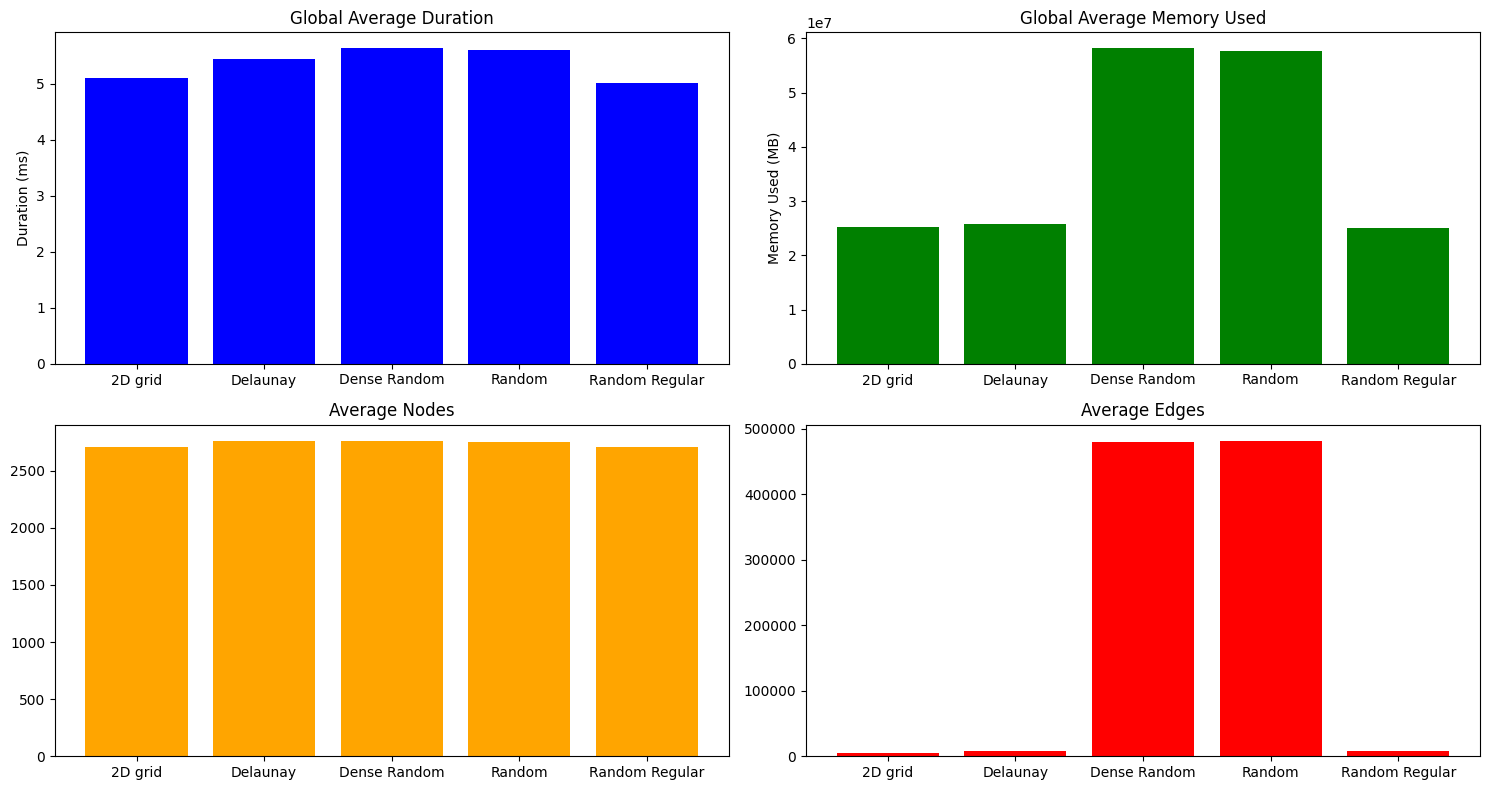

In [51]:
import matplotlib.pyplot as plt

# Plotting the global metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot 1: Global Average Duration
axes[0, 0].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['global_avg_duration'], color='blue')
axes[0, 0].set_title('Global Average Duration')
axes[0, 0].set_ylabel('Duration (ms)')

# Plot 2: Global Average Memory Used
axes[0, 1].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['global_avg_memory_used'], color='green')
axes[0, 1].set_title('Global Average Memory Used')
axes[0, 1].set_ylabel('Memory Used (MB)')

# Plot 3: Average Nodes
axes[1, 0].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['num_nodes'], color='orange')
axes[1, 0].set_title('Average Nodes')

# Plot 4: Average Edges
axes[1, 1].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['num_edges'], color='red')
axes[1, 1].set_title('Average Edges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


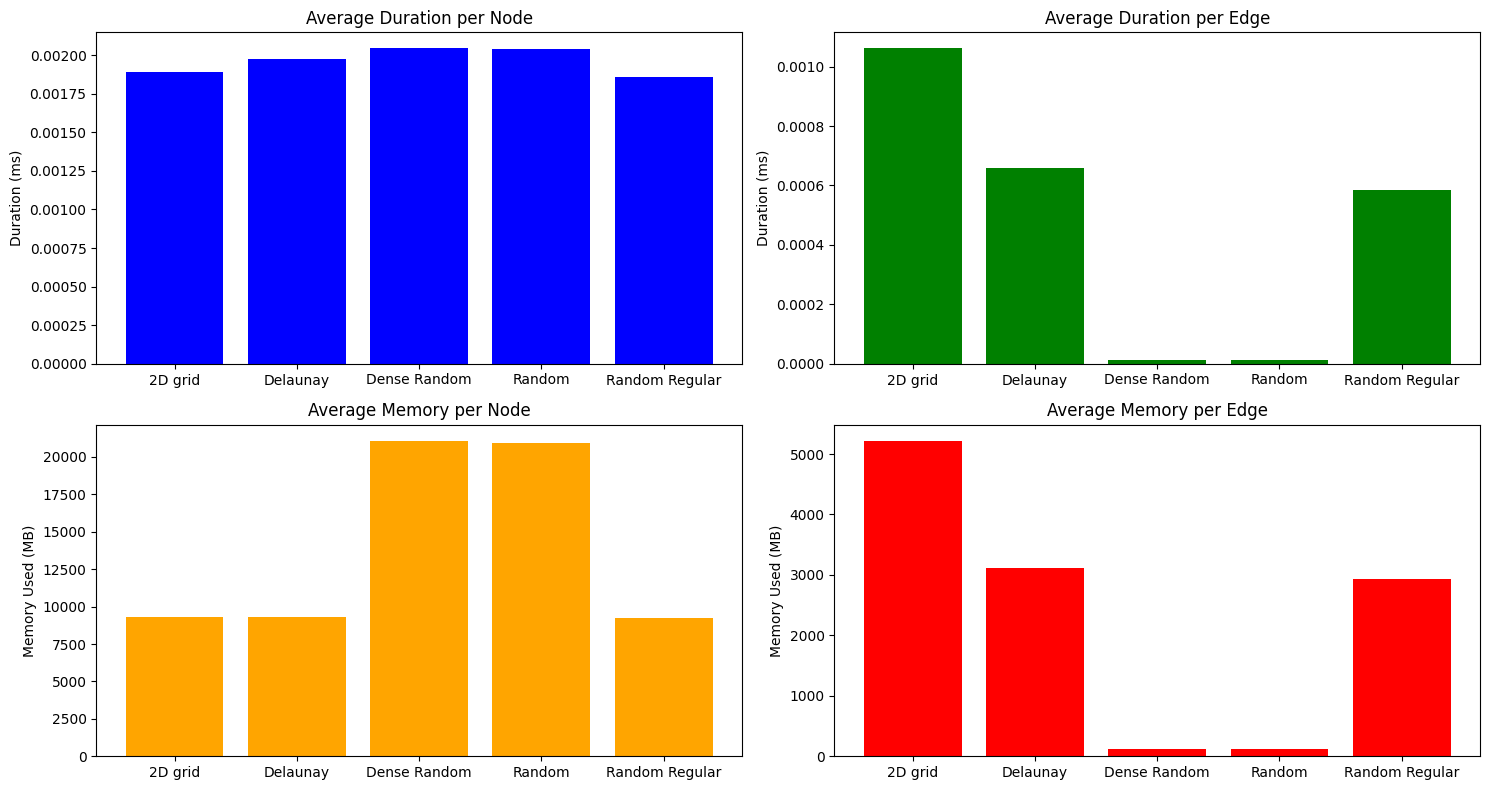

In [52]:
import matplotlib.pyplot as plt

# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot 1: Average Duration per Node
axes[0, 0].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['avg_duration_per_node'], color='blue')
axes[0, 0].set_title('Average Duration per Node')
axes[0, 0].set_ylabel('Duration (ms)')

# Plot 2: Average Duration per Edge
axes[0, 1].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['avg_duration_per_edge'], color='green')
axes[0, 1].set_title('Average Duration per Edge')
axes[0, 1].set_ylabel('Duration (ms)')

# Plot 3: Average Memory per Node
axes[1, 0].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['avg_memory_per_node'], color='orange')
axes[1, 0].set_title('Average Memory per Node')
axes[1, 0].set_ylabel('Memory Used (MB)')

# Plot 4: Average Memory per Edge
axes[1, 1].bar(graphtype_metrics_df['graph_type'], graphtype_metrics_df['avg_memory_per_edge'], color='red')
axes[1, 1].set_title('Average Memory per Edge')
axes[1, 1].set_ylabel('Memory Used (MB)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming meta_metrics_raw is your original DataFrame

# Create a mapping dictionary
algorithm_mapping = {
    'astar_alg': 'A*',
    'dijkstra_alg': 'Dijkstra',
    'bfs_alg': 'BFS',
    'dfs_alg': 'DFS'
}

# Initialize an empty list to store results
algorithm_metrics = []

# Iterate over each algorithm type
for alg, alg_name in algorithm_mapping.items():
    # Create a subset DataFrame for the current algorithm
    subset_df = meta_metrics_raw.filter(like=alg, axis=1)

    # Extract relevant columns for duration and memory
    duration_cols = [f'{alg}_avg_duration', f'{alg}_median_duration', f'{alg}_std_duration']
    memory_cols = [f'{alg}_avg_memory_used', f'{alg}_median_memory_used', f'{alg}_std_memory_used']

    # Calculate global averages for the current algorithm
    avg_duration = subset_df[duration_cols].mean(axis=1).mean()
    avg_memory_used = subset_df[memory_cols].mean(axis=1).mean()

    # Calculate average duration and memory used per node and per edge
    avg_duration_per_node = avg_duration / meta_metrics_raw['num_nodes'].mean()
    avg_duration_per_edge = avg_duration / meta_metrics_raw['num_edges'].mean()
    avg_memory_per_node = avg_memory_used / meta_metrics_raw['num_nodes'].mean()
    avg_memory_per_edge = avg_memory_used / meta_metrics_raw['num_edges'].mean()

    # Append the results to the list
    algorithm_metrics.append({
        'algorithm_type': alg_name,
        'global_avg_duration': avg_duration,
        'global_avg_memory_used': avg_memory_used,
        'avg_duration_per_node': avg_duration_per_node,
        'avg_duration_per_edge': avg_duration_per_edge,
        'avg_memory_per_node': avg_memory_per_node,
        'avg_memory_per_edge': avg_memory_per_edge
    })

# Create a new DataFrame from the list of results
algorithm_metrics_df = pd.DataFrame(algorithm_metrics)

# Display the resulting DataFrame
algorithm_metrics_df


,algorithm_type,global_avg_duration,global_avg_memory_used,avg_duration_per_node,avg_duration_per_edge,avg_memory_per_node,avg_memory_per_edge
0,A*,3.508643,4.505504e+07,0.001282,0.000017,16456.358293,223.892940
1,Dijkstra,5.630669,2.657779e+07,0.002057,0.000028,9707.541768,132.073575
2,BFS,2.627722,2.636667e+07,0.000960,0.000013,9630.426624,131.024403
3,DFS,2.611341,2.637114e+07,0.000954,0.000013,9632.060389,131.046631


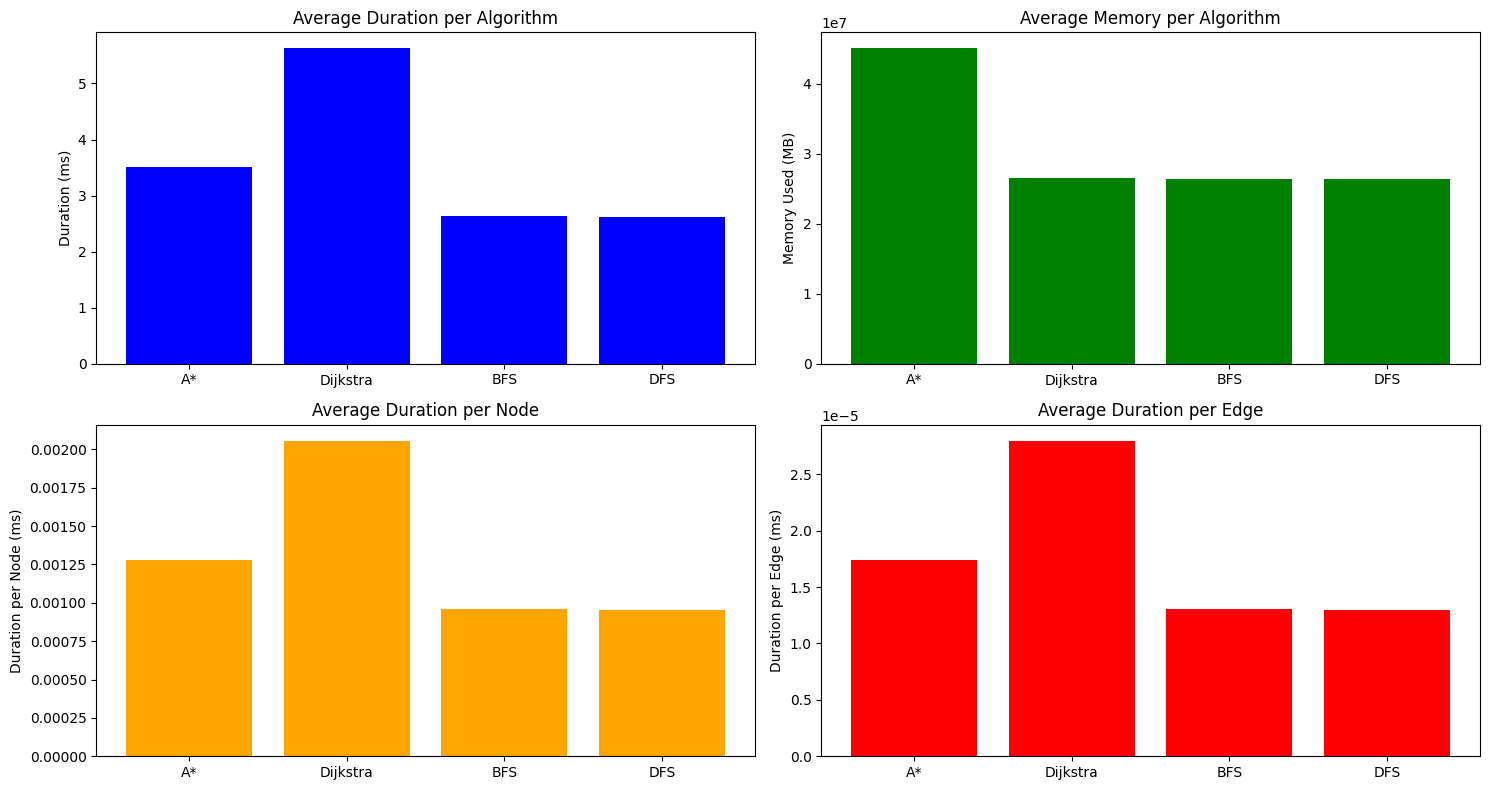

In [54]:
# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot 1: Average Duration per Algorithm
axes[0, 0].bar(algorithm_metrics_df['algorithm_type'], algorithm_metrics_df['global_avg_duration'], color='blue')
axes[0, 0].set_title('Average Duration per Algorithm')
axes[0, 0].set_ylabel('Duration (ms)')

# Plot 2: Average Memory per Algorithm
axes[0, 1].bar(algorithm_metrics_df['algorithm_type'], algorithm_metrics_df['global_avg_memory_used'], color='green')
axes[0, 1].set_title('Average Memory per Algorithm')
axes[0, 1].set_ylabel('Memory Used (MB)')

# Plot 3: Average Duration per Node and Edge
axes[1, 0].bar(algorithm_metrics_df['algorithm_type'], algorithm_metrics_df['avg_duration_per_node'], color='orange')
axes[1, 0].set_title('Average Duration per Node')
axes[1, 0].set_ylabel('Duration per Node (ms)')

axes[1, 1].bar(algorithm_metrics_df['algorithm_type'], algorithm_metrics_df['avg_duration_per_edge'], color='red')
axes[1, 1].set_title('Average Duration per Edge')
axes[1, 1].set_ylabel('Duration per Edge (ms)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
columns_to_drop = [
    'graph_type', 'graph_type_encoded', 'nodes', 'edges', 'starting_node', 'target_node', 'path_length', 
    'astar_alg_avg_duration', 'astar_alg_median_duration', 'astar_alg_std_duration',
    'astar_alg_avg_memory_used', 'astar_alg_median_memory_used', 'astar_alg_std_memory_used',
    'dijkstra_alg_avg_duration', 'dijkstra_alg_median_duration', 'dijkstra_alg_std_duration',
    'dijkstra_alg_avg_memory_used', 'dijkstra_alg_median_memory_used', 'dijkstra_alg_std_memory_used',
    'bfs_alg_avg_duration', 'bfs_alg_median_duration', 'bfs_alg_std_duration',
    'bfs_alg_avg_memory_used', 'bfs_alg_median_memory_used', 'bfs_alg_std_memory_used',
    'dfs_alg_avg_duration', 'dfs_alg_median_duration', 'dfs_alg_std_duration',
    'dfs_alg_avg_memory_used', 'dfs_alg_median_memory_used', 'dfs_alg_std_memory_used'
]

meta_metrics_raw = meta_metrics_raw.drop(columns=columns_to_drop)
meta_metrics_raw

,num_nodes,num_edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,q0.75_degree,variation_coefficient_degree,entropy_degree,best_alg
0,100,286,0.349650,2.860000,0.057778,3,11,5.720000,5.0,5.0,7.0,0.253442,2.439916,dfs_alg
1,101,430,0.234884,4.257426,0.085149,1,14,8.514851,8.0,7.0,10.0,0.299129,3.304714,bfs_alg
2,102,293,0.348123,2.872549,0.056882,3,11,5.745098,5.0,5.0,7.0,0.254100,2.443446,dfs_alg
3,103,296,0.347973,2.873786,0.056349,3,10,5.747573,5.0,5.0,7.0,0.249280,2.420697,dfs_alg
4,104,668,0.155689,6.423077,0.124720,6,21,12.846154,13.0,11.0,15.0,0.235711,3.603178,astar_alg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,4035,7786,0.518238,1.929616,0.000957,2,4,3.859232,4.0,4.0,4.0,0.090853,0.592157,dfs_alg
5936,4036,1377740,0.002929,341.362735,0.169201,602,783,682.725471,682.0,667.0,699.0,0.035473,6.612561,astar_alg
5937,4037,7696,0.524558,1.906366,0.000945,2,4,3.812732,4.0,4.0,4.0,0.102986,0.702529,dfs_alg
5938,4038,1041575,0.003877,257.943289,0.127790,446,588,515.886578,516.0,501.0,531.0,0.041690,6.444196,astar_alg


In [56]:
meta_metrics_raw.sort_values(by="num_nodes")

,num_nodes,num_edges,ratio_n_m,ratio_m_n,density,min_degree,max_degree,mean_degree,median_degree,q0.25_degree,q0.75_degree,variation_coefficient_degree,entropy_degree,best_alg
0,100,286,0.349650,2.860000,0.057778,3,11,5.720000,5.0,5.0,7.0,0.253442,2.439916,dfs_alg
1,101,430,0.234884,4.257426,0.085149,1,14,8.514851,8.0,7.0,10.0,0.299129,3.304714,bfs_alg
2,102,293,0.348123,2.872549,0.056882,3,11,5.745098,5.0,5.0,7.0,0.254100,2.443446,dfs_alg
3,103,296,0.347973,2.873786,0.056349,3,10,5.747573,5.0,5.0,7.0,0.249280,2.420697,dfs_alg
4,104,668,0.155689,6.423077,0.124720,6,21,12.846154,13.0,11.0,15.0,0.235711,3.603178,astar_alg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5095,2265259,0.002249,444.604318,0.174560,791,988,889.208636,889.0,870.0,908.0,0.031321,6.819746,bfs_alg
4996,5096,10045,0.507317,1.971154,0.000774,2,4,3.942308,4.0,4.0,4.0,0.059991,0.321019,astar_alg
4997,5097,947207,0.005381,185.836178,0.072934,311,450,371.672356,371.0,359.0,384.0,0.049865,6.241604,astar_alg
4998,5098,2386715,0.002136,468.166928,0.183703,837,1041,936.333856,936.0,917.0,955.0,0.030038,6.834992,astar_alg


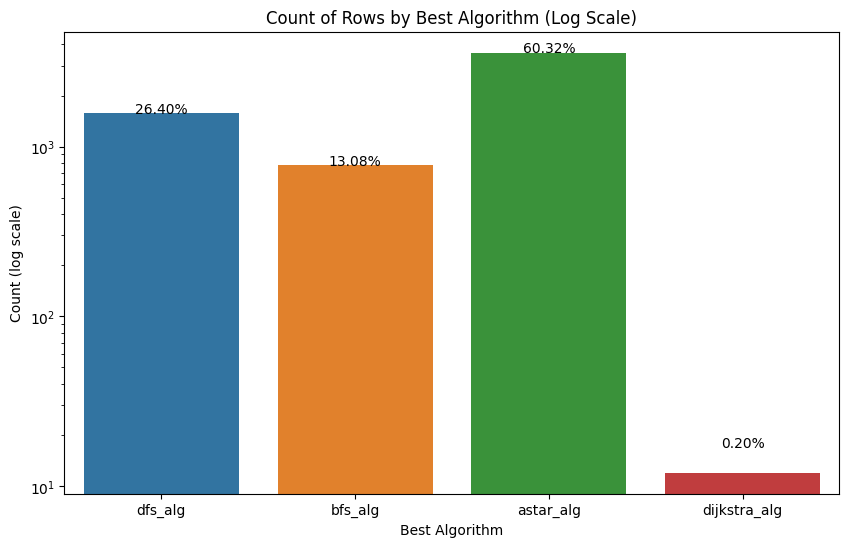

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the sorted DataFrame stored in meta_metrics_raw
# If not, replace it with the actual DataFrame variable name

# Sort the DataFrame by "num_nodes"
meta_metrics_sorted = meta_metrics_raw.sort_values(by="num_nodes")

# Plot the count of rows by the "best_alg" column in log scale
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="best_alg", data=meta_metrics_sorted)
plt.yscale("log")

# Display the count on top of each bar as a percentage
total_rows = len(meta_metrics_sorted)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 5,
            f'{height/total_rows:.2%}',
            ha="center")

plt.title("Count of Rows by Best Algorithm (Log Scale)")
plt.xlabel("Best Algorithm")
plt.ylabel("Count (log scale)")
plt.show()


In [58]:
# Drop rows where "best_alg" is "dijkstra_alg"
meta_metrics_raw = meta_metrics_raw[meta_metrics_raw['best_alg'] != 'dijkstra_alg']

In [59]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and test sets
df_train, df_test = train_test_split(meta_metrics_raw, test_size=0.1, random_state=99, shuffle=True)

# Save the train set
train_filename = os.path.join("data", "df_train.csv")
df_train.to_csv(train_filename, index=False, header=True)

# Save the test set
test_filename = os.path.join("data", "df_test.csv")
df_test.to_csv(test_filename, index=False, header=True)